In [149]:
#!/usr/bin/python
import scipy
import scipy.io
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
matFiles = ['American75.mat', 'Amherst41.mat','Auburn71.mat','BC17.mat','BU10.mat', 'Baylor93.mat','Berkeley13.mat','Bingham82.mat',
            'Bowdoin47.mat','Brandeis99.mat','Brown11.mat','Bucknell39.mat','Cal65.mat','Caltech36.mat','Carnegie49.mat',
            'Colgate88.mat','Columbia2.mat','Cornell5.mat','Dartmouth6.mat','Duke14.mat','Emory27.mat','FSU53.mat',
            'GWU54.mat','Georgetown15.mat','Hamilton46.mat','Harvard1.mat','Haverford76.mat','Howard90.mat','Indiana69.mat',
            'JMU79.mat','Johns55.mat','Lehigh96.mat','MIT8.mat','MSU24.mat','MU78.mat','Maine59.mat','Maryland58.mat',
            'Mich67.mat','Michigan23.mat','Middlebury45.mat','Mississippi66.mat','NYU9.mat','Northeastern19.mat','Northwestern25.mat',
            'Notre Dame57.mat','Oberlin44.mat','Oklahoma97.mat','Penn94.mat','Pepperdine86.mat','Princeton12.mat','Reed98.mat',
            'Rice31.mat','Rochester38.mat','Rutgers89.mat','Santa74.mat','Simmons81.mat','Smith60.mat','Stanford3.mat',
            'Swarthmore42.mat','Syracuse56.mat','Temple83.mat','Tennessee95.mat','Texas80.mat','Texas84.mat','Trinity100.mat',
            'Tufts18.mat','Tulane29.mat','UC33.mat','UC61.mat','UC64.mat','UCF52.mat','UCLA26.mat','UCSB37.mat','UCSC68.mat',
            'UCSD34.mat','UChicago30.mat','UConn91.mat','UF21.mat','UGA50.mat','UIllinois20.mat','UMass92.mat','UNC28.mat',
            'UPenn7.mat','USC35.mat','USF51.mat','USFCA72.mat','UVA16.mat','Vanderbilt48.mat','Vassar85.mat','Vermont70.mat',
            'Villanova62.mat','Virginia63.mat','Wake73.mat','WashU32.mat','Wellesley22.mat','Wesleyan43.mat','William77.mat',
            'Williams40.mat','Wisconsin87.mat','Yale4.mat']

In [93]:
def graph(i):
    d = {}
    scipy.io.loadmat(i, d)
    for keys,values in d.items():
        if keys == "A":
            sources, targets = values.nonzero()
            g = ig.Graph(zip(sources, targets))    
    return g

In [104]:
def size(i):
    d = {}
    scipy.io.loadmat(i, d)
    for keys,values in d.items():
        if keys == "A":
            break
    return values.shape[0]

In [114]:
def size_total(matFiles):
    n = []
    for mat in matFiles:
        n += [size(mat)]
    return n

In [ ]:
x = size_total(matFiles)

## (i) Gender

In [219]:
def gender(i):
    d={}
    scipy.io.loadmat("%s" % (i), d)
    genders = []
    g = graph(i)
    for keys,values in d.items():
        if keys == "local_info":
            for i in range(len(values)):
                genders += [values[i][1]]
         
    return g.modularity(genders)

gender("American75.mat") 

0.013114890843283405

In [100]:
def gender_total(matFiles):
    q = []
    for mat in matFiles:
        q += [gender(mat)]
    return q

In [106]:
gender_y = gender_total(matFiles)

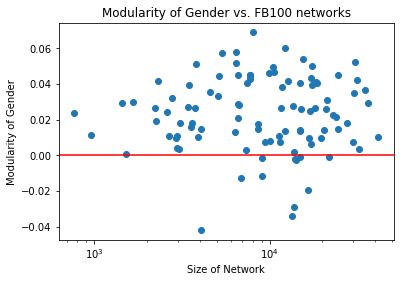

In [220]:
def gender_scatterplot(y, x):
    plt.plot(x , y, 'o')
    ax = plt.gca()
    ax.set_xscale('log')
    plt.axhline(color='r')
    plt.ylabel('Modularity of Gender')
    plt.xlabel('Size of Network')
    plt.title("Modularity of Gender vs. FB100 networks")
    plt.show()
    
gender_scatterplot(gender_y, x)

#### Gender Density Plot and Histogram

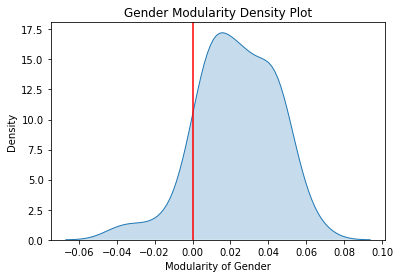

In [176]:
sns.distplot(gender_y, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 1})
plt.axvline(color='r')
plt.ylabel('Density')
plt.xlabel('Modularity of Gender')
plt.title("Gender Modularity Density Plot")
plt.show()

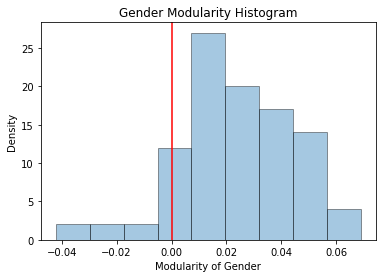

In [213]:
sns.distplot(gender_y, hist = True, kde = False, hist_kws={'edgecolor':'black', 'linewidth': 1})
plt.axvline(color='r')
plt.ylabel('Density')
plt.xlabel('Modularity of Gender')
plt.title("Gender Modularity Histogram")
plt.show()

## (ii) Student/Faculty Status

In [112]:
def status(i):
    d={}
    scipy.io.loadmat("%s" % (i), d)
    status = []
    g = graph(i)
    for keys,values in d.items():
        if keys == "local_info":
            for i in range(len(values)):
                status += [values[i][0]]
                
    return g.modularity(status)

In [118]:
def status_total(matFiles):
    q = []
    for mat in matFiles:
        q += [status(mat)]
    return q

In [119]:
status_y = status_total(matFiles)

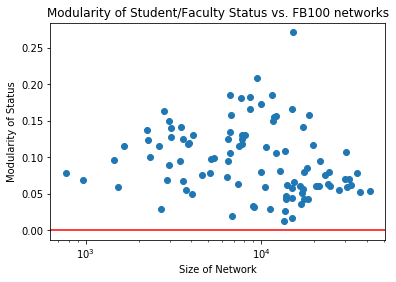

In [128]:
def status_scatterplot(y, x):
    plt.plot(x , y, 'o')
    ax = plt.gca()
    ax.set_xscale('log')
    plt.axhline(color='r')
    plt.ylabel('Modularity of Status')
    plt.xlabel('Size of Network')
    plt.title("Modularity of Student/Faculty Status vs. FB100 networks")
    plt.show()
    
status_scatterplot(status_y, x)

#### Status Density Plot and Histogram

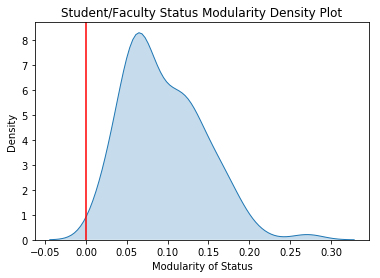

In [174]:
sns.distplot(status_y, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 1})
plt.axvline(color='r')
plt.ylabel('Density')
plt.xlabel('Modularity of Status')
plt.title("Student/Faculty Status Modularity Density Plot")
plt.show()

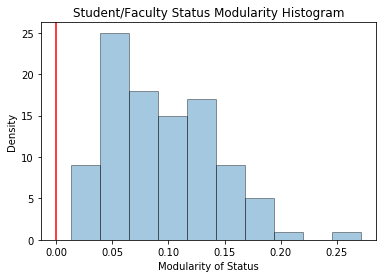

In [214]:
sns.distplot(status_y, hist = True, kde = False, hist_kws={'edgecolor':'black', 'linewidth': 1})
plt.axvline(color='r')
plt.ylabel('Density')
plt.xlabel('Modularity of Status')
plt.title("Student/Faculty Status Modularity Histogram")
plt.show()

## (iii) Major

In [133]:
def major(i):
    d={}
    scipy.io.loadmat("%s" % (i), d)
    majors = []
    g = graph(i)
    for keys,values in d.items():
        if keys == "local_info":
            for i in range(len(values)):
                majors += [values[i][2]]
                
    return g.modularity(majors)

In [134]:
def major_total(matFiles):
    q = []
    for mat in matFiles:
        q += [major(mat)]
    return q

In [135]:
major_y = major_total(matFiles)

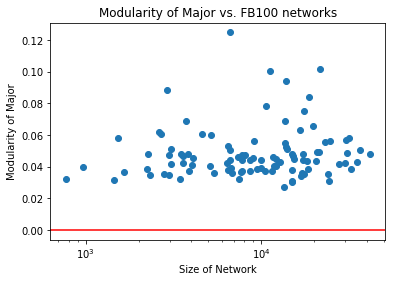

In [136]:
def major_scatterplot(y, x):
    plt.plot(x , y, 'o')
    ax = plt.gca()
    ax.set_xscale('log')
    plt.axhline(color='r')
    plt.ylabel('Modularity of Major')
    plt.xlabel('Size of Network')
    plt.title("Modularity of Major vs. FB100 networks")
    plt.show()
    
major_scatterplot(major_y, x)

#### Major Density Plot and Histogram

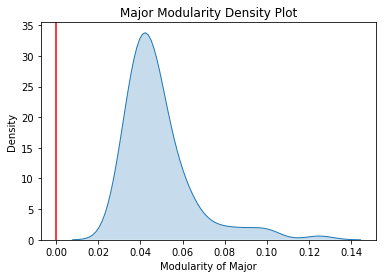

In [209]:
sns.distplot(major_y, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 1})
plt.axvline(color='r')
plt.ylabel('Density')
plt.xlabel('Modularity of Major')
plt.title("Major Modularity Density Plot")
plt.show()

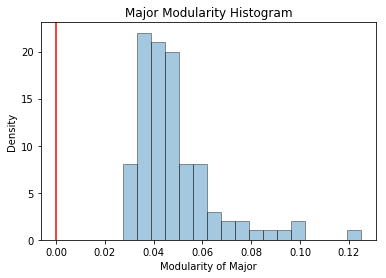

In [215]:
sns.distplot(major_y, hist = True, kde = False, hist_kws={'edgecolor':'black', 'linewidth': 1})
plt.axvline(color='r')
plt.ylabel('Density')
plt.xlabel('Modularity of Major')
plt.title("Major Modularity Histogram")
plt.show()

## (iv) Vertex Degree

In [145]:
def degree(i):
    d={}
    scipy.io.loadmat("%s" % (i), d)
    g = graph(i)
    degrees = g.degree()
    return g.modularity(degrees)

In [146]:
def degree_total(matFiles):
    q = []
    for mat in matFiles:
        q += [degree(mat)]
    return q

In [147]:
degree_y = degree_total(matFiles)

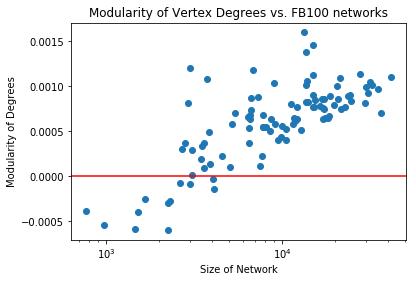

In [148]:
def degree_scatterplot(y, x):
    plt.plot(x , y, 'o')
    ax = plt.gca()
    ax.set_xscale('log')
    plt.axhline(color='r')
    plt.ylabel('Modularity of Degrees')
    plt.xlabel('Size of Network')
    plt.title("Modularity of Vertex Degrees vs. FB100 networks")
    plt.show()
    
degree_scatterplot(degree_y, x)

#### Degree Density Plot and Histogram

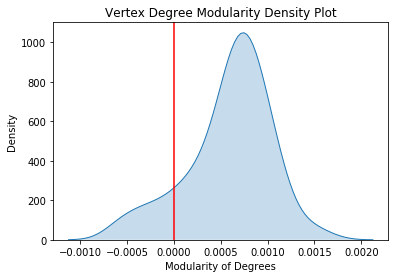

In [216]:
sns.distplot(degree_y, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 1})
plt.axvline(color='r')
plt.ylabel('Density')
plt.xlabel('Modularity of Degrees')
plt.title("Vertex Degree Modularity Density Plot")
plt.show()

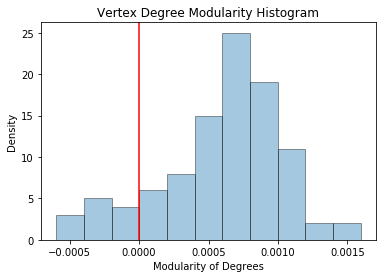

In [206]:
sns.distplot(degree_y, hist = True, kde = False, hist_kws={'edgecolor':'black', 'linewidth': 1})
#sns.distplot(degree_y, hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})
plt.axvline(color='r')
plt.ylabel('Density')
plt.xlabel('Modularity of Degrees')
plt.title("Vertex Degree Modularity Histogram")
plt.show()